In [21]:
from traceback_with_variables import activate_in_ipython_by_import
from PIL import Image
import numpy as np
im = Image.open("image.png")
(im.format, im.size, im.mode, np.array(im).shape)

('PNG', (500, 500), 'RGBA', (500, 500, 4))

In [26]:
np.asarray(im)[np.where(np.asarray(im))]

array([ 52, 155,  60, ..., 247, 231,  52], dtype=uint8)

In [22]:
threshold = 150
src = np.array(im)[:, :, 3] < 150

In [23]:
%%time
pixels = np.array(np.where(1 - src))
I = np.arange(src.shape[0]).reshape(-1,1,1)
J = np.arange(src.shape[1]).reshape(1,-1,1)

dist = np.ones(src.shape) * 1000
for k in range(10):
    print(k)
    i, j = pixels[:, k::10].reshape(2, 1, 1, -1)
    dist = np.minimum(dist, np.min(np.sqrt((I - i)**2 + (J - j)**2), axis = -1))

0
1
2
3
4
5
6
7
8
9
CPU times: user 21 s, sys: 14.8 s, total: 35.8 s
Wall time: 36 s


In [10]:
"""
%%time
pixels = np.array(np.where(1 - src))[:, :]
I = np.arange(500).reshape(-1,1,1)
J = np.arange(500).reshape(1,-1,1)

groups = 10

def compute(k):
    i, j = pixels[:, k::groups].reshape(2, 1, 1, -1)
    dist = np.min(np.sqrt((I - i)**2 + (J - j)**2), axis = -1, initial = 1000)
    print(k)
    return dist

import multiprocessing as mpl
with mpl.Pool(4) as p:
    dist = np.min(p.map(compute, range(groups), chunksize = 1), axis = 0)
dist
"""

3
2
0
1


KeyboardInterrupt: 

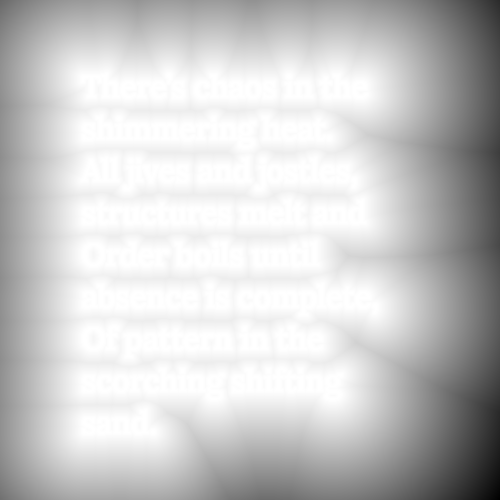

In [24]:
quantised = 255 - (dist / np.max(dist) * 255).astype(np.uint8)
#quantised = (quantised % 2) * 255
im2 = Image.fromarray(quantised, mode = 'L')
im2 = im2.convert("RGBA")
im2.save('distfield.png')
im2

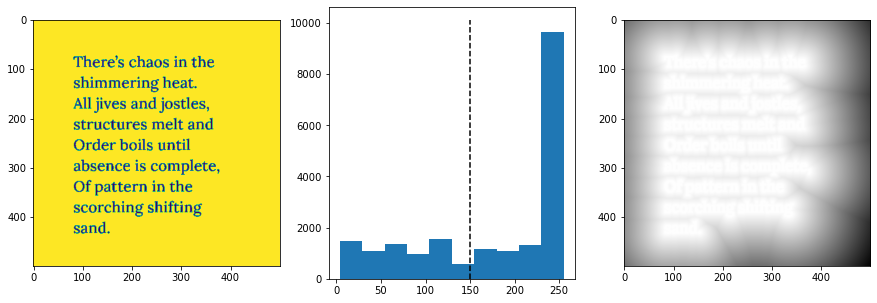

In [25]:
from matplotlib import pyplot as plt
f, axes = plt.subplots(ncols = 3, figsize = (15,5))
axes[0].imshow(src)
axes[2].imshow(im2)
vals = np.array(im)[:, :, 3].flatten()
axes[1].hist(vals[vals > 1]);
axes[1].vlines(threshold, *axes[1].get_ylim(), linestyle = '--')

In [357]:
poem = """What is the value of a fact?
a question theoretical
answers are asymmetrical
given your comfort with abstracts.

You may feel personally attacked
or held within the metrical
we research the aesthetical –
how the world’s forces interact.

Boundaries expanded at college
lead to discoveries anew
this – far from being vanity –
increase our collective knowledge
applied, we hope, life will improve
for the good of humanity.
"""
print("<br>\n".join("".join(f"<span>{word} </span>" for word in line.split()) for line in poem.split('\n')))

<span>What </span><span>is </span><span>the </span><span>value </span><span>of </span><span>a </span><span>fact? </span><br>
<span>a </span><span>question </span><span>theoretical </span><br>
<span>answers </span><span>are </span><span>asymmetrical </span><br>
<span>given </span><span>your </span><span>comfort </span><span>with </span><span>abstracts. </span><br>
<br>
<span>You </span><span>may </span><span>feel </span><span>personally </span><span>attacked </span><br>
<span>or </span><span>held </span><span>within </span><span>the </span><span>metrical </span><br>
<span>we </span><span>research </span><span>the </span><span>aesthetical </span><span>– </span><br>
<span>how </span><span>the </span><span>world’s </span><span>forces </span><span>interact. </span><br>
<br>
<span>Boundaries </span><span>expanded </span><span>at </span><span>college </span><br>
<span>lead </span><span>to </span><span>discoveries </span><span>anew </span><br>
<span>this </span><span>– </span><span>far </span>

In [21]:
[line.split() for line in poem.split('\n')]

[['There’s', 'chaos', 'in', 'the', 'shimmering', 'heat,'],
 ['All', 'jives', 'and', 'jostles,', 'structures', 'melt', 'and'],
 ['Order', 'boils', 'until', 'absence', 'is', 'complete,'],
 ['Of', 'pattern', 'in', 'the', 'scorching', 'shifting', 'sand.'],
 [],
 ['While', 'bitter,', 'on', 'the', 'other', 'side,', 'jutting'],
 ['Great', 'crystal', 'castles.', 'Lattice', 'works', 'of', 'ice.'],
 ['Their', 'shear', 'edges', 'almost', 'touching,', 'cutting'],
 ['Cleaving', 'space', 'apart,', 'to', 'each', 'a', 'separate', 'slice.'],
 [],
 ['It’s', 'in', 'between', 'that', 'pattern', 'start', 'to', 'dance,'],
 ['merging', 'melting', 'bodies,', 'all', 'together.'],
 ['Hypnotic', 'orchestras', 'dictate', 'their', 'trance.'],
 ['Connected', 'through', 'some', 'esoteric', 'aether.'],
 [],
 ['These', 'littles', 'worlds', 'found', 'only', 'at', 'the', 'borders'],
 ['create', 'their', 'own', 'unique', 'and', 'gentle', 'orders']]

In [22]:
[line for line in poem.split('\n')]

['There’s chaos in the shimmering heat,',
 'All jives and jostles, structures melt and',
 'Order boils until absence is complete,',
 'Of pattern in the scorching shifting sand.',
 '',
 'While bitter, on the other side, jutting',
 'Great crystal castles. Lattice works of ice.',
 'Their shear edges almost touching, cutting',
 'Cleaving space apart, to each a separate slice.',
 '',
 'It’s in between that pattern start to dance,',
 'merging melting bodies, all together. ',
 'Hypnotic orchestras dictate their trance. ',
 'Connected through some esoteric aether.',
 '',
 'These littles worlds found only at the borders',
 ' create their own unique and gentle orders ']

In [5]:
#definitions
example_string = "It was the best of times, it was the worst of times."
l = ["one",2,'goal',4,5]

#functions and methods
#functions: print, str

#def name_of_the_function(arg1, arg2, arg3):
    #lines 
    #of 
    #code 
#    return values

def number_reverse(num):
    print(type(num))
    string = str(num)
    print(type(string))
    string = string[::-1]
    print(type(string))
    reversed_num = int(string)
    print(reversed_num)
    return reversed_num
    
a = number_reverse(123)
a + 1

<class 'int'>
<class 'str'>
<class 'str'>
321


322

In [22]:
#.             0.     1           2
countries = ['UK', 'Germany', 'France']

def countryname_to_code(country):
    if country == 'UK': 
        code = 'GB'
    elif country == 'Germany':
        assert(False)
        code = 'DE'
    elif country == 'France':
        code = 'FR'
        
    return code

#codes = ['GB', 'DE', 'FR']
codes = []
for name in countries:
    code = countryname_to_code(name)
    print(name, code, codes)
    codes.append(code) #adds to the end of codes


codes

Traceback with variables (most recent call last):
  File "<ipython-input-22-24a588543f2c>", line 18, in <module>
    code = countryname_to_code(name)
      __name__ = '__main__'
      __doc__ = 'Automatically created module for IPython interactive environment'
      __package__ = None
      __loader__ = None
      __spec__ = None
      __builtin__ = <module 'builtins' (built-in)>
      __builtins__ = <module 'builtins' (built-in)>
      _ih = ['', '#definitions\nexample_string = "It was the best of times, it was the worst of times."\nl = ["one",2,\'goal\',4,5]\n\n#functions and methods\n#functions: print, str\n\n#def name_of_the_function(arg1, arg2, arg3):\n    #lines \n    #of \n    #code \n#    return values\n\ndef number_reverse(num):\n    print(num)\n    string = str(num)\n    print(string)\n    string = string[::-1]\n    print(string)\n    reversed_num = int(string)\n    return reversed_num\n    print(reversed_num)\n    \na = number_reverse(123)', '#definitions\nexample_string = "

UK GB []


In [15]:
isUSA = (countries[1] == 'USA')
isUSA

True

In [351]:
a = np.random.normal(size= 255)

for i in range(30):
    std = np.std(a)
    print(std, len(a))
    outliers = abs(a) > 2*std
    a = a[~outliers]
print(f'{len(a)/255*100:.2f}')

0.9934433327794776 255
0.8806781434786721 243
0.8333014977294684 236
0.810432536599234 232
0.7931691928814201 229
0.7770441563234508 226
0.7669694873848476 224
0.7555672298341362 222
0.750594457546299 221
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
0.7392962035994641 219
85.88


In [354]:
b = np.arange(100)
np.std(b)

28.86607004772212